In [0]:
install.packages("bsts")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘BoomSpikeSlab’, ‘zoo’, ‘xts’, ‘Boom’




In [0]:
library("bsts")

Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: ‘bsts’


The following object is masked from ‘package:BoomSpikeSlab’:

    SuggestBurn




In [0]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library("readxl")

#Hurdle 1

##BSTS model 1


1.   The training and test data is the hurdle 1 data 

1.   The training data is daily data with 12000 rows and
     the test data is 39 rows 4 week data
5.   The data was tranformed using log tranformation to 
     scale  down the large variables




In [0]:
data<-read_excel("Training-Data-Sets.xlsx")
data=data[,-1]
train=log(data)

In [0]:
(model_components <- list())

list()

In [0]:
summary(model_components <- AddLocalLinearTrend(model_components, 
                                        y = train$EQ))

     Length Class            Mode
[1,] 6      LocalLinearTrend list

In [0]:
fit2 <- bsts(EQ~ .,state.specification=model_components,
              data = train, niter = 5000,ping=100)

=-=-=-=-= Iteration 0 Tue Mar 31 16:27:35 2020 =-=-=-=-=
=-=-=-=-= Iteration 100 Tue Mar 31 16:27:44 2020 =-=-=-=-=
=-=-=-=-= Iteration 200 Tue Mar 31 16:27:52 2020 =-=-=-=-=
=-=-=-=-= Iteration 300 Tue Mar 31 16:28:00 2020 =-=-=-=-=
=-=-=-=-= Iteration 400 Tue Mar 31 16:28:08 2020 =-=-=-=-=
=-=-=-=-= Iteration 500 Tue Mar 31 16:28:16 2020 =-=-=-=-=
=-=-=-=-= Iteration 600 Tue Mar 31 16:28:25 2020 =-=-=-=-=
=-=-=-=-= Iteration 700 Tue Mar 31 16:28:33 2020 =-=-=-=-=
=-=-=-=-= Iteration 800 Tue Mar 31 16:28:41 2020 =-=-=-=-=
=-=-=-=-= Iteration 900 Tue Mar 31 16:28:49 2020 =-=-=-=-=
=-=-=-=-= Iteration 1000 Tue Mar 31 16:28:57 2020 =-=-=-=-=
=-=-=-=-= Iteration 1100 Tue Mar 31 16:29:05 2020 =-=-=-=-=
=-=-=-=-= Iteration 1200 Tue Mar 31 16:29:14 2020 =-=-=-=-=
=-=-=-=-= Iteration 1300 Tue Mar 31 16:29:22 2020 =-=-=-=-=
=-=-=-=-= Iteration 1400 Tue Mar 31 16:29:30 2020 =-=-=-=-=
=-=-=-=-= Iteration 1500 Tue Mar 31 16:29:38 2020 =-=-=-=-=
=-=-=-=-= Iteration 1600 Tue Mar 31 16:29:46 2020 =-

In [0]:
burn<-SuggestBurn(0.1,fit2)

In [0]:
PostiveMean<-function(b){
  b<-b[abs(b)>0]
if (length(b)>0)
   return(mean(b))
return(0)  
}

In [0]:
library(ggplot2)
library(reshape2)

In [0]:
coeff <- data.frame(melt(apply(fit2$coefficients[-(1:burn),], 2, PostiveMean)))

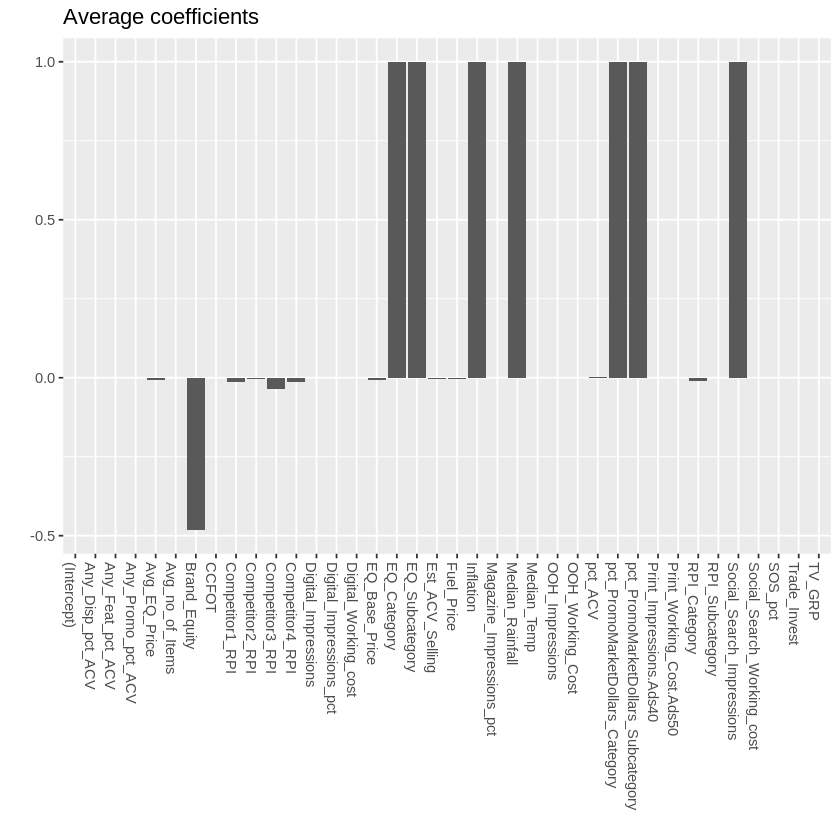

In [0]:
coeff$Variable <- as.character(row.names(coeff))
ggplot(data=coeff, aes(x=Variable, y=value)) + 
  geom_bar(stat="identity", position="identity") + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
  xlab("") + ylab("") + ggtitle("Average coefficients")

In [0]:
inclusionprobs <- melt(colMeans(fit2$coefficients[-(1:burn),] != 0))

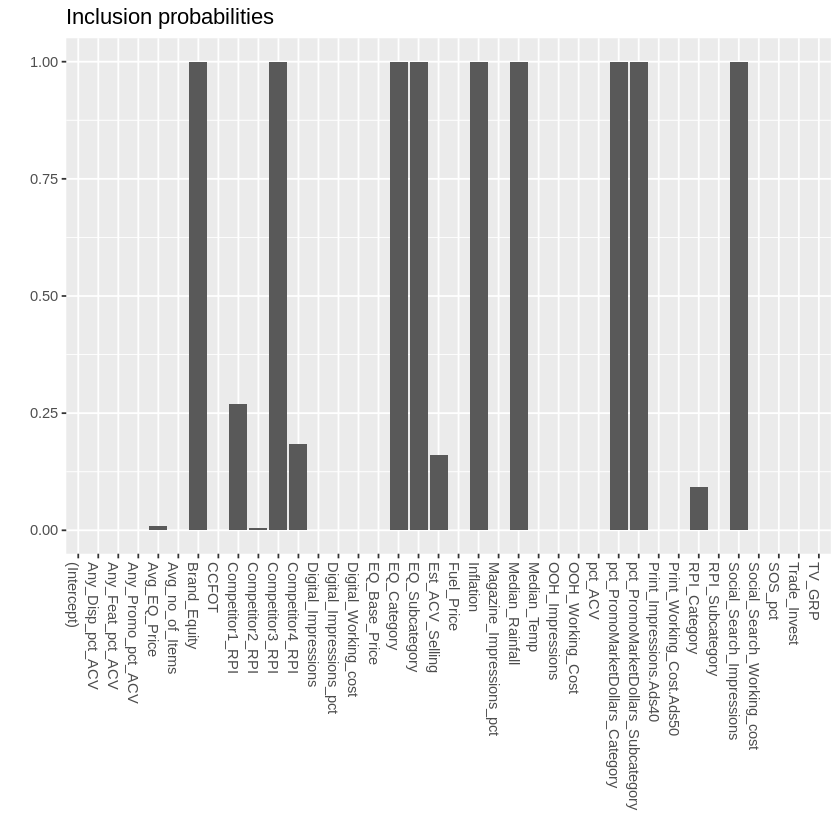

In [0]:

inclusionprobs$Variable <- as.character(row.names(inclusionprobs))
ggplot(data=inclusionprobs, aes(x=Variable, y=value)) + 
  geom_bar(stat="identity", position="identity") + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0)) + 
  xlab("") + ylab("") + ggtitle("Inclusion probabilities")

In [0]:
test<-read_excel("Test dataset v1.xlsx")
test<-test[,-1]
test=log(test)

In [0]:
pred <- predict(fit2, burn = burn, quantiles = c(.05, .95),newdata=test)


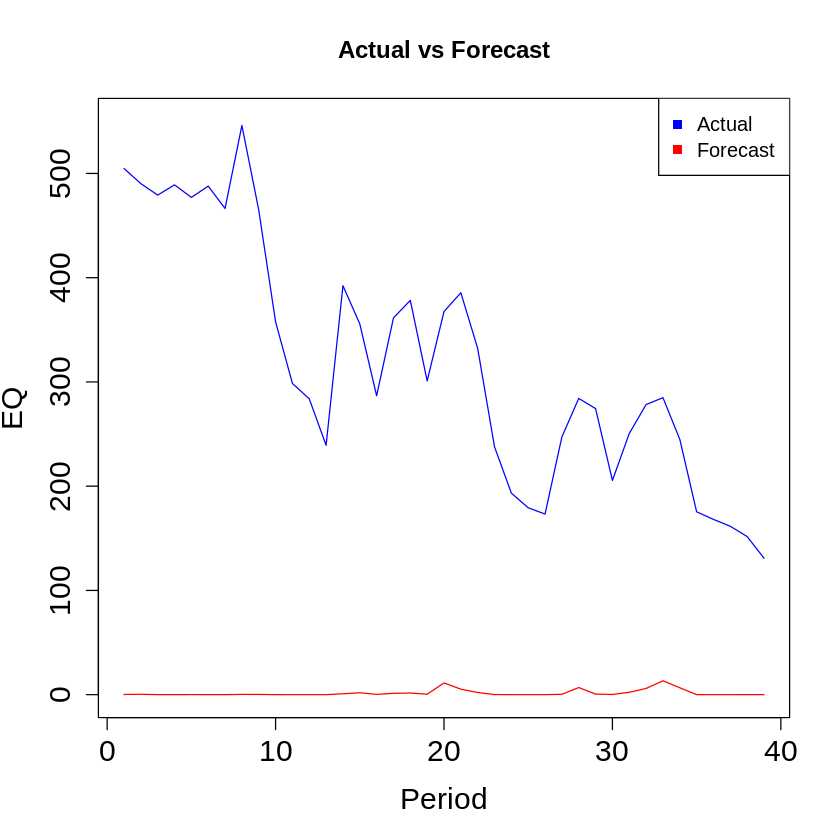

In [0]:
plot(exp(pred$mean), type="l", col="red" ,ylim=range(0,550),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Forecast",xlab="Period")
lines((exp(test$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_fit2 = sum(abs((exp(test$EQ) - exp(pred$mean)) / exp(test$EQ))) / 39
print(paste("The test mape is :",toString(mape_fit2)))


[1] "The test mape is : 0.994760704402176"


In [0]:
pred <- predict(fit2, burn = burn, quantiles = c(.05, .95),newdata=train)


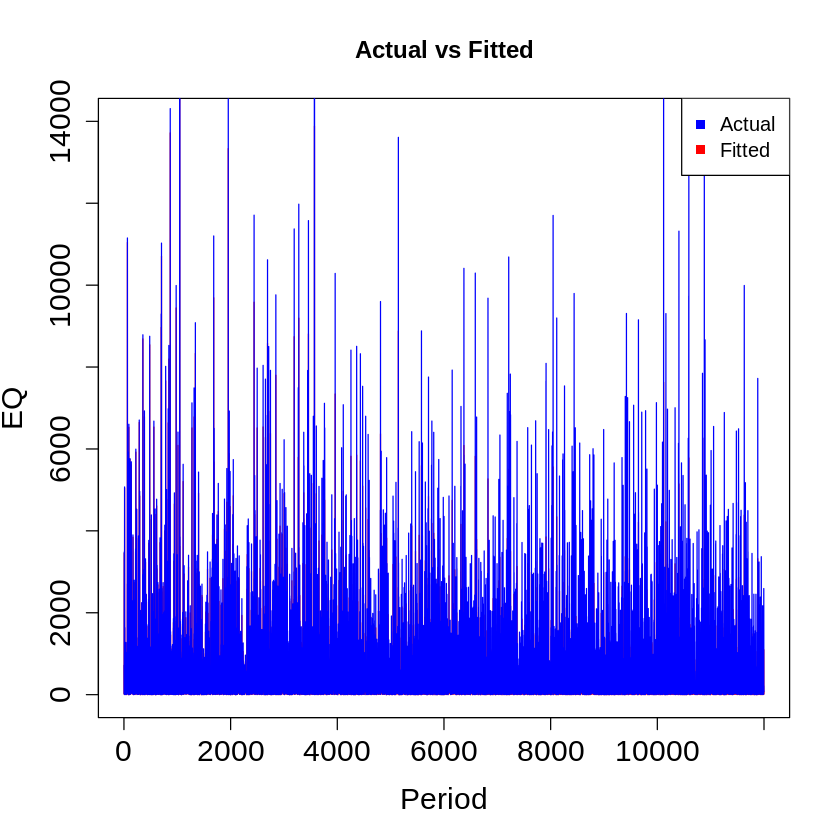

In [0]:
plot(exp(pred$mean), type="l", col="red" ,ylim=range(0,14000),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Fitted",xlab="Period")
lines((exp(train$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_fit2 = sum(abs((exp(train$EQ) - exp(pred$mean)) / exp(train$EQ))) / 12000
print(paste("The train mape is :",toString(mape_fit2)))

[1] "The train mape is : 0.363193585382089"


##BSTS Model 2

1.   The training and test data is the hurdle 1 test data 

1.   The training data is daily data with 33 rows and
     the test data is 6 rows 4 week data
5.   The data was tranformed using log tranformation to 
     scale  down the large variables


In [0]:
data <- read_excel("Test dataset v1.xlsx")

In [0]:
data=data[,-1]
train=data[1:33,]
train=log(train)

In [0]:
(model_components <- list())

list()

In [0]:
summary(model_components <- AddLocalLinearTrend(model_components, 
                                        y = train$EQ))

     Length Class            Mode
[1,] 6      LocalLinearTrend list

In [0]:
fit2 <- bsts(EQ~ .,state.specification=model_components,
              data = train, niter = 10000,ping=100)

=-=-=-=-= Iteration 0 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 100 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 200 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 300 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 400 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 500 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 600 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 700 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 800 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 900 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 1000 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 1100 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 1200 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 1300 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 1400 Tue Mar 31 16:36:31 2020 =-=-=-=-=
=-=-=-=-= Iteration 1500 Tue Mar 31 16:36:32 2020 =-=-=-=-=
=-=-=-=-= Iteration 1600 Tue Mar 31 16:36:32 2020 =-

In [0]:
burn<-SuggestBurn(0.2,fit2)

In [0]:
PostiveMean<-function(b){
  b<-b[abs(b)>0]
if (length(b)>0)
   return(mean(b))
return(0)  
}

In [0]:
library(ggplot2)
library(reshape2)

In [0]:
coeff <- data.frame(melt(apply(fit2$coefficients[-(1:burn),], 2, PostiveMean)))

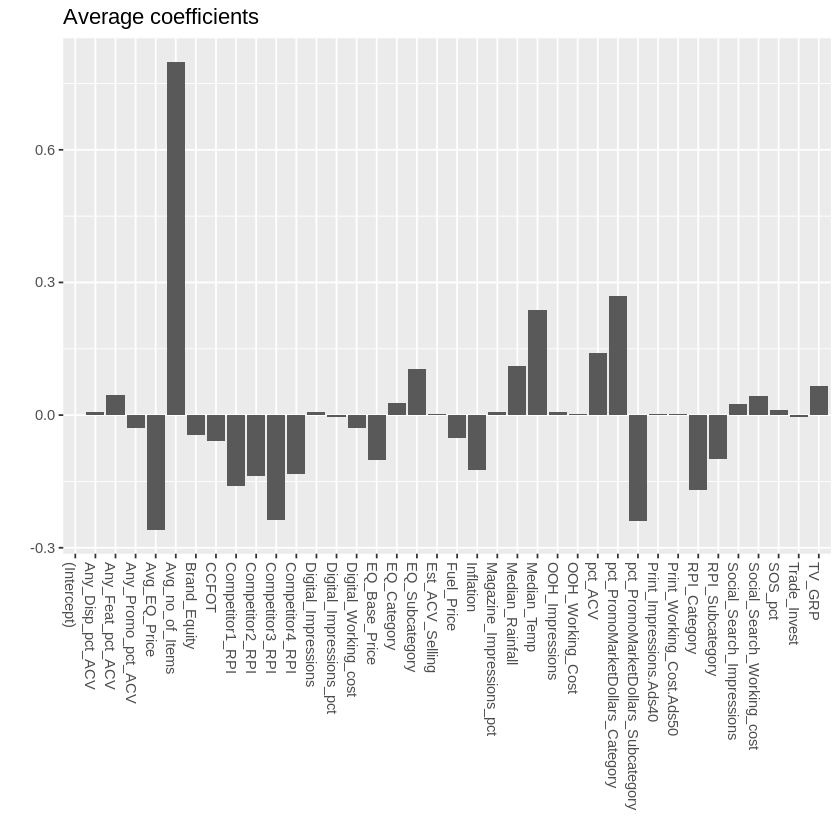

In [0]:
coeff$Variable <- as.character(row.names(coeff))
ggplot(data=coeff, aes(x=Variable, y=value)) + 
  geom_bar(stat="identity", position="identity") + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
  xlab("") + ylab("") + ggtitle("Average coefficients")

In [0]:
inclusionprobs <- melt(colMeans(fit2$coefficients[-(1:burn),] != 0))

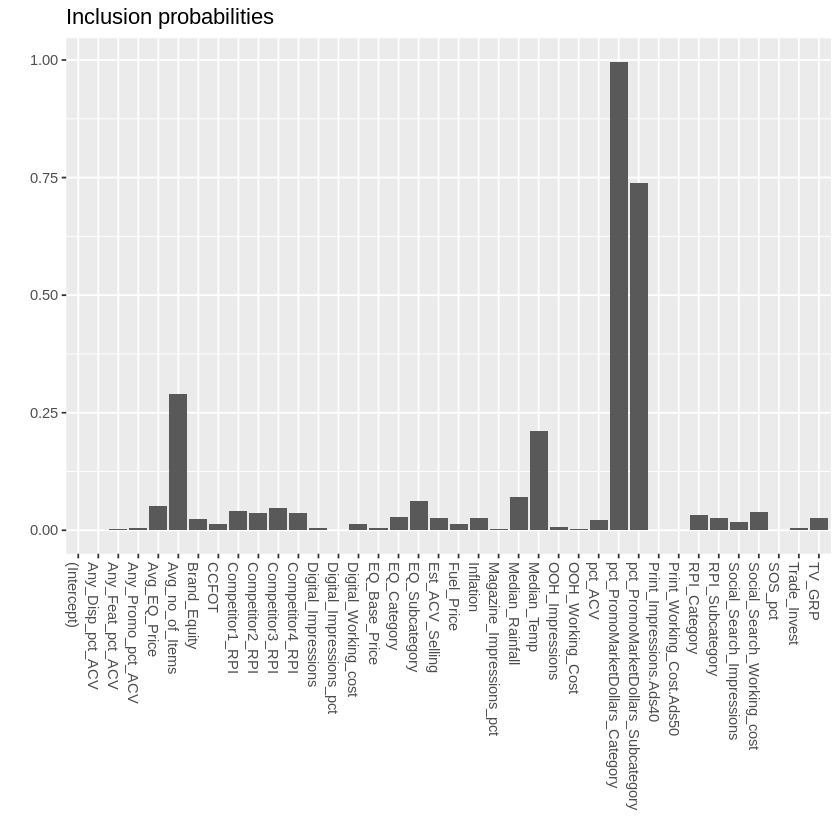

In [0]:

inclusionprobs$Variable <- as.character(row.names(inclusionprobs))
ggplot(data=inclusionprobs, aes(x=Variable, y=value)) + 
  geom_bar(stat="identity", position="identity") + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0)) + 
  xlab("") + ylab("") + ggtitle("Inclusion probabilities")

In [0]:
test<- data[34:39,]
test=log(test)

In [0]:
pred <- predict(fit2, burn = burn, quantiles = c(.05, .95),newdata=test)


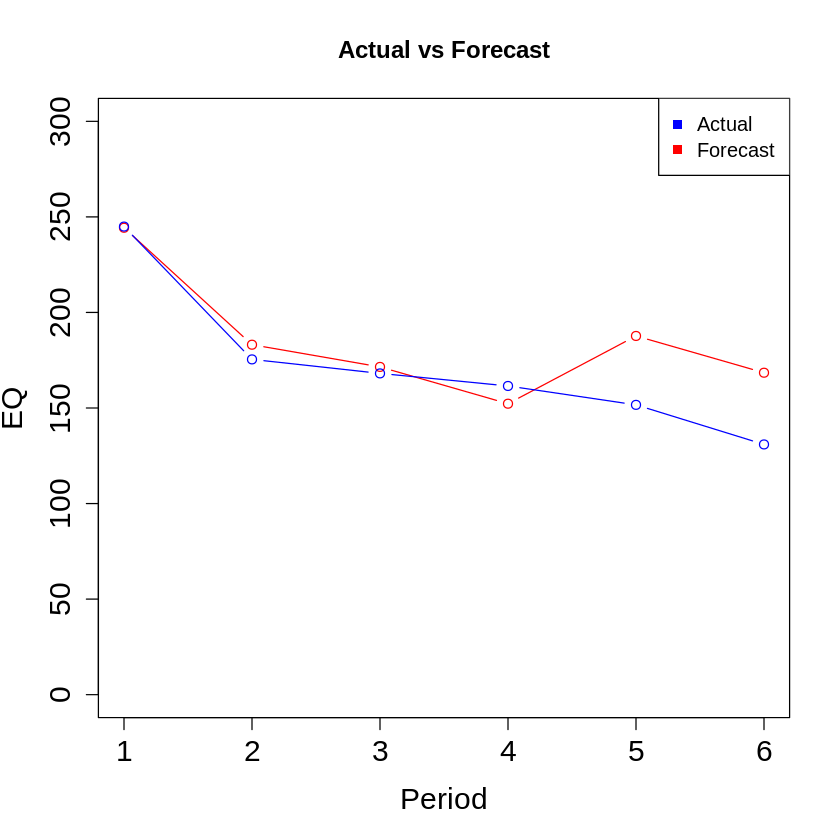

In [0]:
plot(exp(pred$mean), type="b", col="red" ,ylim=range(0,300),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Forecast",xlab="Period")
lines((exp(test$EQ)), type="b",col="blue")
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_fit2 = sum(abs((exp(test$EQ) - exp(pred$mean)) / exp(test$EQ))) / 6
print(paste("The test mape is :",toString(mape_fit2)))

[1] "The test mape is : 0.10805213852231"


In [0]:
pred <- predict(fit2, burn = burn, quantiles = c(.05, .95),olddata=train,newdata=train)


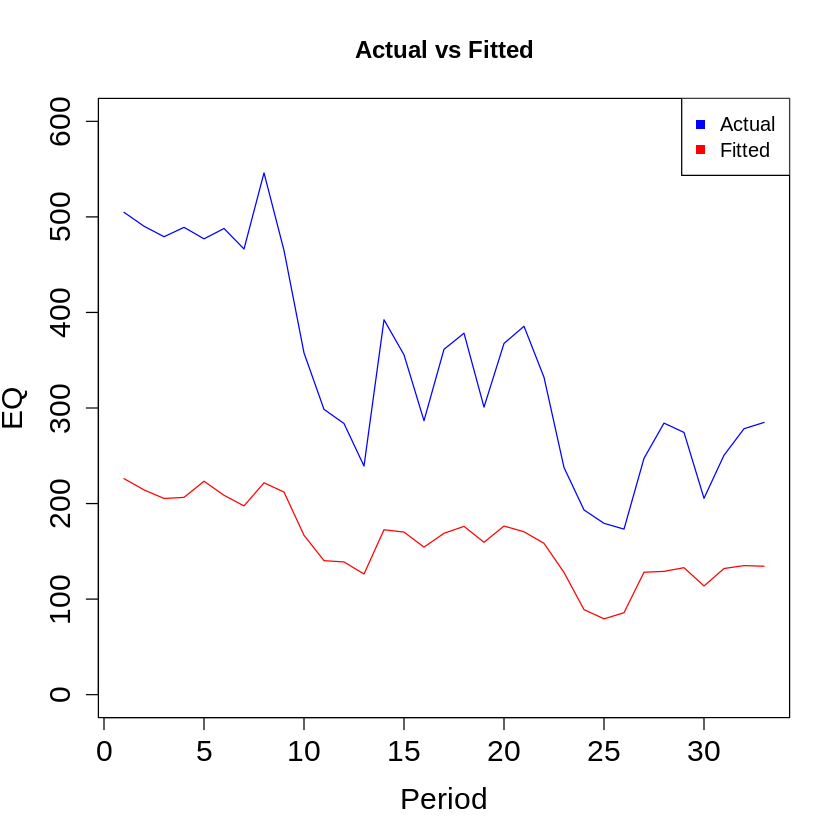

In [0]:
plot(exp(pred$mean), type="l", col="red" ,ylim=range(0,600),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Fitted",xlab="Period")
lines((exp(train$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_fit2 = sum(abs((exp(train$EQ) - exp(pred$mean)) / exp(train$EQ))) / 33
print(paste("The train mape is :",toString(mape_fit2)))

[1] "The train mape is : 0.526692479562425"


#Hurdle 2

##BSTS Model 3


1.   The training and test data is the hurdle 2 data with 
     missing values
2.   The missing values were filled using KNN

1.   The training and test data were merged before using
     KNN to fill the missing data as the assumpotion was
     that both train and test data came from the same
     distribution .
1.   Since we wanted to predict the model as a time series
     model,after merging the train and test data,we sorted 
     by the Period column and set aside the last 6 values 
     as test set
     
5.   The data was tranformed using log tranformation to 
     scale  down the large variables




In [0]:
data <- read_excel("new_train.xlsx")

New names:
* `` -> ...1



In [0]:
data=data[,-1]

In [0]:
train=data[1:33,]
train=log(train)

In [0]:
(model_components <- list())

list()

In [0]:
summary(model_components <- AddLocalLinearTrend(model_components, 
                                        y = train$EQ))

     Length Class            Mode
[1,] 6      LocalLinearTrend list

In [0]:
fit2 <- bsts(EQ~ .,state.specification=model_components,
              data = train, niter = 10000,ping=100)

=-=-=-=-= Iteration 0 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 100 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 200 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 300 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 400 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 500 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 600 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 700 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 800 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 900 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 1000 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 1100 Tue Mar 31 16:37:03 2020 =-=-=-=-=
=-=-=-=-= Iteration 1200 Tue Mar 31 16:37:04 2020 =-=-=-=-=
=-=-=-=-= Iteration 1300 Tue Mar 31 16:37:04 2020 =-=-=-=-=
=-=-=-=-= Iteration 1400 Tue Mar 31 16:37:04 2020 =-=-=-=-=
=-=-=-=-= Iteration 1500 Tue Mar 31 16:37:04 2020 =-=-=-=-=
=-=-=-=-= Iteration 1600 Tue Mar 31 16:37:04 2020 =-

In [0]:
burn<-SuggestBurn(0.2,fit2)

In [0]:
PostiveMean<-function(b){
  b<-b[abs(b)>0]
if (length(b)>0)
   return(mean(b))
return(0)  
}

In [0]:
library(ggplot2)
library(reshape2)

In [0]:
coeff <- data.frame(melt(apply(fit2$coefficients[-(1:burn),], 2, PostiveMean)))

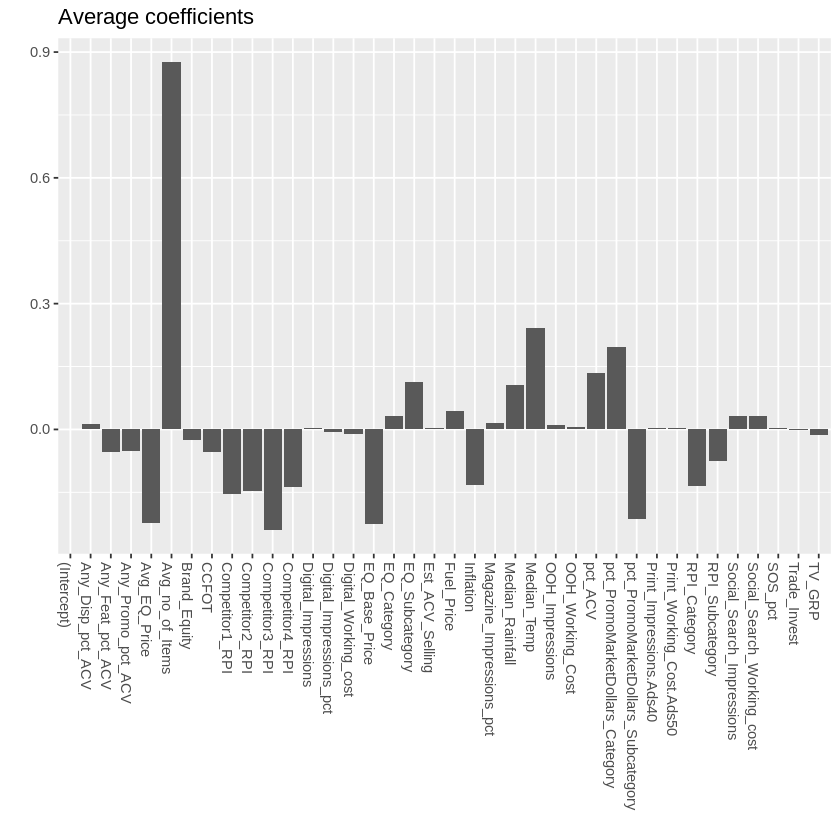

In [0]:
coeff$Variable <- as.character(row.names(coeff))
ggplot(data=coeff, aes(x=Variable, y=value)) + 
  geom_bar(stat="identity", position="identity") + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0)) +
  xlab("") + ylab("") + ggtitle("Average coefficients")

In [0]:
inclusionprobs <- melt(colMeans(fit2$coefficients[-(1:burn),] != 0))

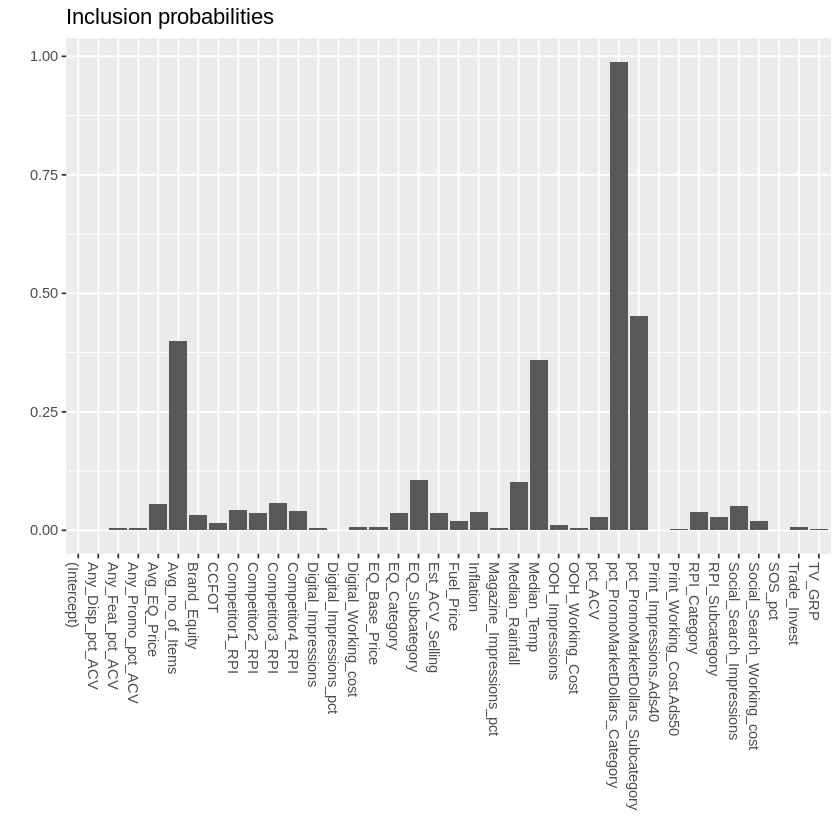

In [0]:

inclusionprobs$Variable <- as.character(row.names(inclusionprobs))
ggplot(data=inclusionprobs, aes(x=Variable, y=value)) + 
  geom_bar(stat="identity", position="identity") + 
  theme(axis.text.x=element_text(angle = -90, hjust = 0)) + 
  xlab("") + ylab("") + ggtitle("Inclusion probabilities")

In [0]:
test<- data[34:39,]
test=log(test)

In [0]:
pred <- predict(fit2, burn = burn, quantiles = c(.05, .95),newdata=test)


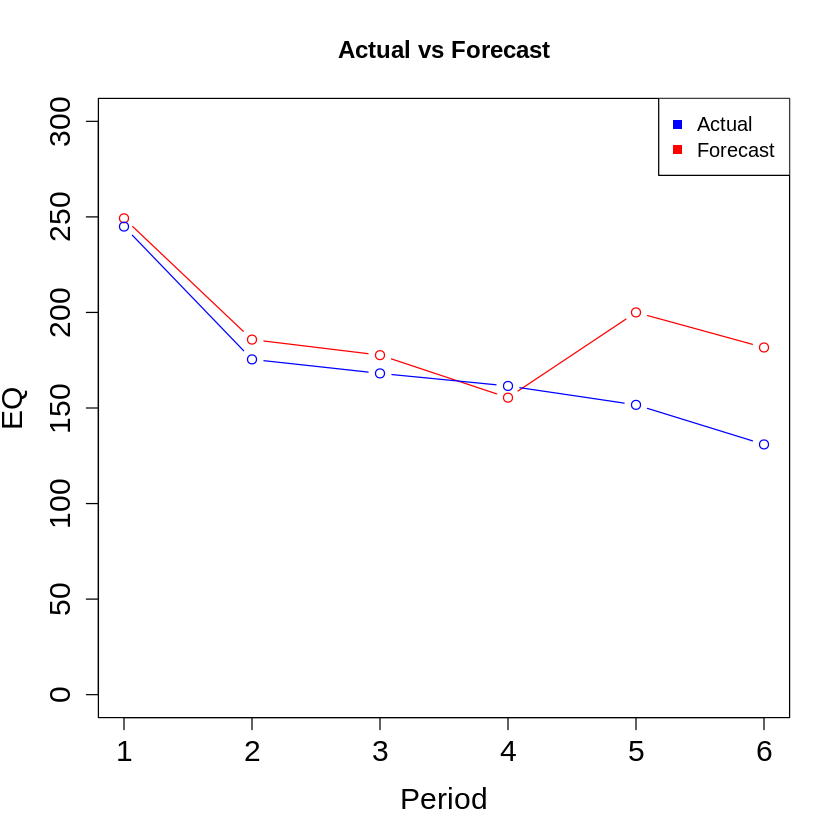

In [0]:
plot(exp(pred$mean), type="b", col="red" ,ylim=range(0,300),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Forecast",xlab="Period")
lines((exp(test$EQ)), type="b",col="blue")
legend("topright",legend=c("Actual","Forecast"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_fit2 = sum(abs((exp(test$EQ) - exp(pred$mean)) / exp(test$EQ))) / 6
print(paste("The test mape is :",toString(mape_fit2)))

[1] "The test mape is : 0.14630613444221"


In [0]:
pred <- predict(fit2, burn = burn, quantiles = c(.05, .95),olddata=train,newdata=train)


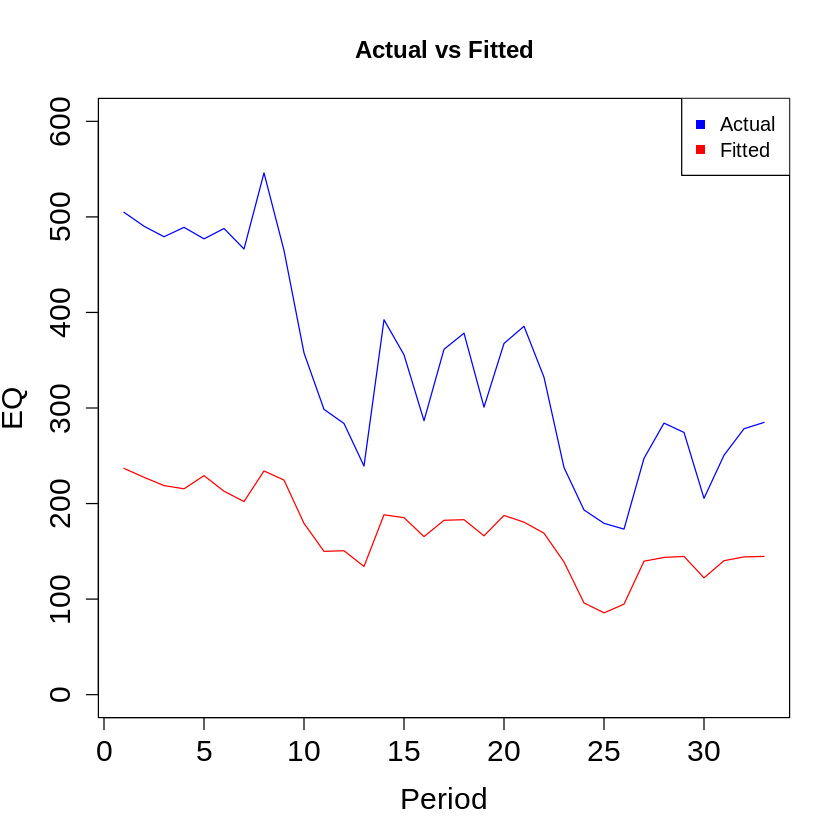

In [0]:
plot(exp(pred$mean), type="l", col="red" ,ylim=range(0,600),ylab="EQ",cex.lab=1.5,cex.axis=1.5,main="Actual vs Fitted",xlab="Period")
lines((exp(train$EQ)), type="l",col="blue")
legend("topright",legend=c("Actual","Fitted"),pch=c(15,15),col=c('blue','red'))

In [0]:
mape_fit2 = sum(abs((exp(train$EQ) - exp(pred$mean)) / exp(train$EQ))) / 33
print(paste("The train mape is :",toString(mape_fit2)))

[1] "The train mape is : 0.494653312148059"
